In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy.stats as st
import seaborn.objects as so
import seaborn as sns

In [6]:
palette = ['#003f5c', '#bc5090', '#ffa600', 'darkgoldenrod', 'navy', 'darkmagenta'] #https://matplotlib.org/stable/gallery/color/named_colors.html
marker_size = 8  # Ustalony rozmiar markerów
xlabel = "Distance beetwen AP and STAs [m]"

In [7]:
data = pd.read_csv('distance2.csv').drop_duplicates()
data

,rngRun,flow,nStations,distance,linksNumber,loss,jitter,latency,throughput,rxBytes,txBytes,rxPackets,txPackets,timeFirstRxPacket,timeFirstTxPacket,timeLastRxPacket,timeLastTxPacket,jitterSum,delaySum,rateAdaptationManager
0,407456,1,1,3,1,54.731500,0.000231,1.420720,57.4986,904256648,1997539120,591791,1307290,1.00950,1.00950,120.994,120.994,136.8000,840768.0,ns3::IdealWifiManager
1,407456,2,1,3,1,54.483300,0.000229,1.412570,57.8146,909213480,1997539120,595035,1307290,1.01744,1.01744,121.000,121.000,136.3420,840528.0,ns3::IdealWifiManager
2,407456,1,1,1,1,48.312300,0.000181,1.262570,65.6480,1032481824,1997539120,675708,1307290,1.00830,1.00830,121.000,121.000,122.5400,853130.0,ns3::IdealWifiManager
3,407456,2,1,1,1,48.280000,0.000181,1.271330,65.6964,1033128168,1997539120,676131,1307290,1.02124,1.02124,120.999,120.999,122.1660,859584.0,ns3::IdealWifiManager
4,407456,1,1,1,2,0.394557,0.000012,0.049259,126.5100,1989657696,1997539120,1302132,1307290,1.01028,1.01028,121.000,121.000,15.2622,64141.5,ns3::IdealWifiManager
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,407457,2,1,39,3,51.284200,0.000188,1.346430,61.8770,973117496,1997539120,636857,1307290,1.01511,1.01511,121.000,121.000,119.7990,857481.0,ns3::IdealWifiManager
626,407457,1,1,41,2,69.829900,0.000392,1.873730,38.3187,602660008,1997539120,394411,1307290,1.00822,1.00822,121.000,121.000,154.7460,739021.0,ns3::IdealWifiManager
627,407457,2,1,41,2,55.827400,0.000219,1.448830,56.1052,882364992,1997539120,577464,1307290,1.01272,1.01272,121.000,121.000,126.2030,836647.0,ns3::IdealWifiManager
628,407457,1,1,41,3,69.846800,0.000393,1.874500,38.2973,602322320,1997539120,394190,1307290,1.00810,1.00810,121.000,121.000,154.7390,738909.0,ns3::IdealWifiManager


C:\Users\Admin\AppData\Local\Temp\ipykernel_27448\1127819035.py:6: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  ax = sns.lineplot(data=plot_sum, x='distance', y='throughput', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='flow')
C:\Users\Admin\AppData\Local\Temp\ipykernel_27448\1127819035.py:12: UserWarning: Mismatched number of handles and labels: len(handles) = 6 len(labels) = 3
  ax.legend(


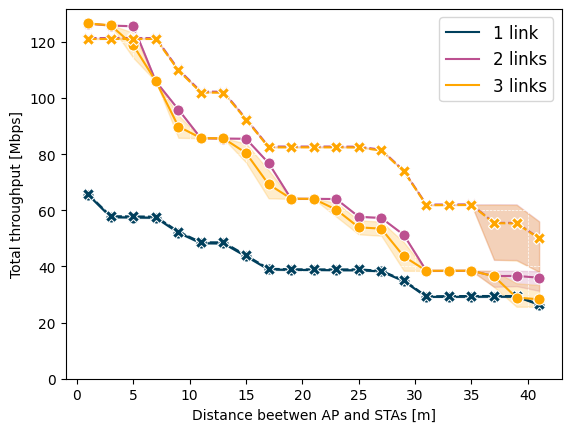

In [16]:
plot_sum = data.groupby(['distance', 'linksNumber', 'rngRun', 'throughput', 'loss', 'jitter', 'latency']).sum().reset_index()
plot_sum
ax = None
plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)

ax = sns.lineplot(data=plot_sum, x='distance', y='throughput', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='flow')
ax.tick_params(axis='y', which='both', labelleft=True)
for line in ax.get_lines():  # Modyfikacja markerów w istniejących liniach
    line.set_markersize(marker_size)

handles, labels = ax.get_legend_handles_labels()
ax.legend(
      handles=handles[1:7],
      labels=['1 link', '2 links', '3 links'],
      ncol=1,              # Liczba kolumn w legendzie
      fontsize='large',   # Rozmiar czcionki
    )
ax.set_ylim(0)  # Ustawienie minimalnej wartości osi Y na 0 dla Throughput
ax.set(xlabel=xlabel, ylabel='Total throughput [Mbps]')
plt.savefig('dist_thr.svg', bbox_inches='tight')

C:\Users\Admin\AppData\Local\Temp\ipykernel_27448\38003952.py:4: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  ax = sns.lineplot(data=plot_sum, x='distance', y='loss', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='flow')


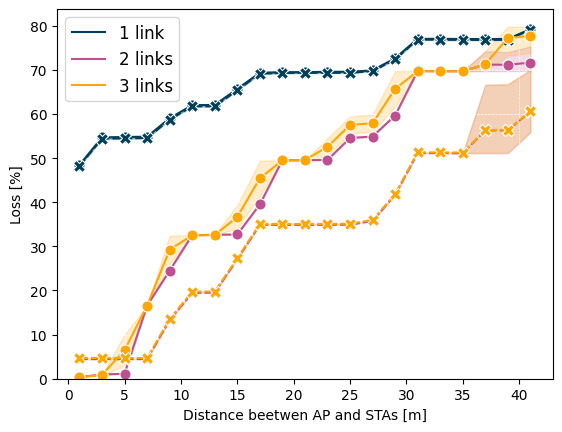

In [9]:
ax = None
plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)

ax = sns.lineplot(data=plot_sum, x='distance', y='loss', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='flow')
ax.tick_params(axis='y', which='both', labelleft=True)
for line in ax.get_lines():  # Modyfikacja markerów w istniejących liniach
    line.set_markersize(marker_size)

handles, labels = ax.get_legend_handles_labels()
ax.legend(
      handles=handles[1:4],
      labels=['1 link', '2 links', '3 links'],
      ncol=1,              # Liczba kolumn w legendzie
      fontsize='large',   # Rozmiar czcionki
    )
ax.set_ylim(0) 
ax.set(xlabel=xlabel, ylabel='Loss [%]')
plt.savefig('dist_loss.svg', bbox_inches='tight')

In [10]:
plot_sum = plot_sum[plot_sum['latency'] != 0]

C:\Users\Admin\AppData\Local\Temp\ipykernel_27448\2634326855.py:4: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  ax = sns.lineplot(data=plot_sum, x='distance', y='jitter', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='flow')


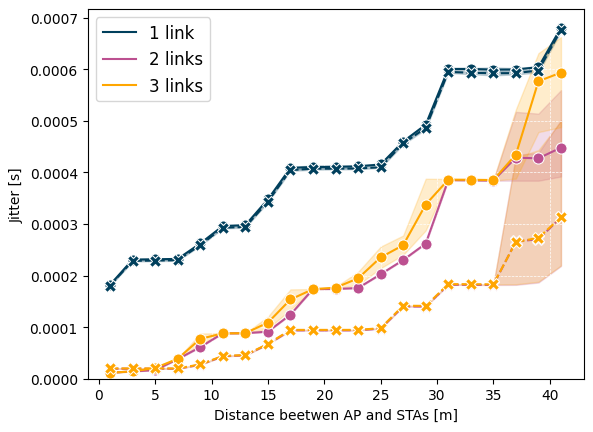

In [11]:
ax = None
plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)

ax = sns.lineplot(data=plot_sum, x='distance', y='jitter', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='flow')
ax.tick_params(axis='y', which='both', labelleft=True)
for line in ax.get_lines():  # Modyfikacja markerów w istniejących liniach
    line.set_markersize(marker_size)

handles, labels = ax.get_legend_handles_labels()
ax.legend(
      handles=handles[1:4],
      labels=['1 link', '2 links', '3 links'],
      ncol=1,              # Liczba kolumn w legendzie
      fontsize='large',   # Rozmiar czcionki
    )
ax.set_ylim(0) 
ax.set(xlabel=xlabel, ylabel='Jitter [s]')
plt.savefig('dist_jitt.svg', bbox_inches='tight')

C:\Users\Admin\AppData\Local\Temp\ipykernel_27448\322965947.py:4: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  ax = sns.lineplot(data=plot_sum, x='distance', y='latency', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='flow')


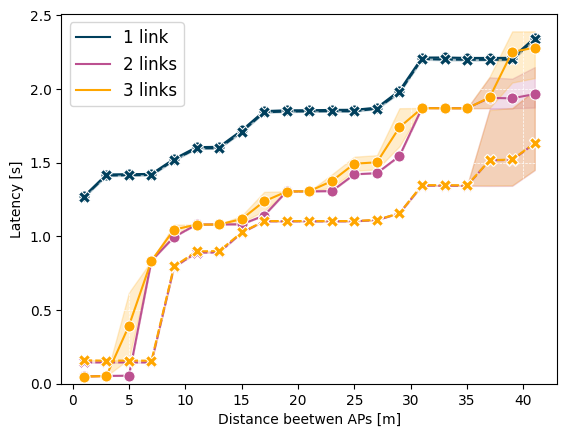

In [12]:
ax = None
plt.grid(color = 'white', linestyle = '--', linewidth = 0.5)

ax = sns.lineplot(data=plot_sum, x='distance', y='latency', hue='linksNumber', errorbar=('ci'), markers=True, palette=palette, ax=ax, style='flow')
ax.tick_params(axis='y', which='both', labelleft=True)
for line in ax.get_lines():  # Modyfikacja markerów w istniejących liniach
    line.set_markersize(marker_size)

handles, labels = ax.get_legend_handles_labels()
ax.legend(
      handles=handles[1:4],
      labels=['1 link', '2 links', '3 links'],
      ncol=1,              # Liczba kolumn w legendzie
      fontsize='large',   # Rozmiar czcionki
    )
ax.set(xlabel='Distance beetwen APs [m]', ylabel='Latency [s]')
ax.set_ylim(0)  
plt.savefig('dist_lat.svg', bbox_inches='tight')

C:\Users\Admin\AppData\Local\Temp\ipykernel_27448\3404055936.py:4: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.lineplot(data=plot_sum, x='distance', y='throughput', hue='linksNumber',
C:\Users\Admin\AppData\Local\Temp\ipykernel_27448\3404055936.py:19: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.lineplot(data=plot_sum, x='distance', y='loss', hue='linksNumber',


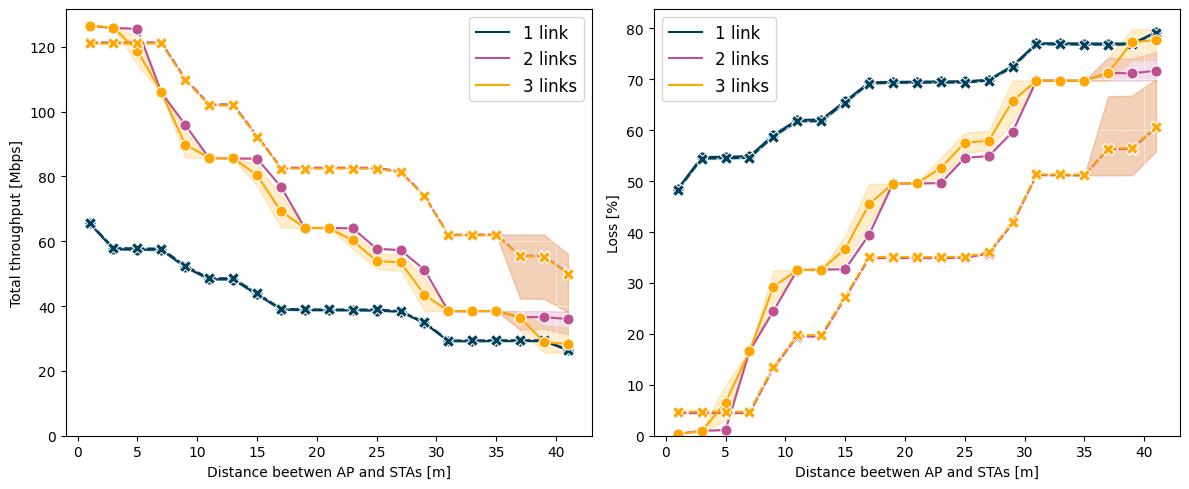

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)  # Dwa wykresy w jednym rzędzie

# Pierwszy wykres - Throughput
sns.lineplot(data=plot_sum, x='distance', y='throughput', hue='linksNumber', 
             errorbar=('ci'), markers=True, palette=palette, ax=axes[0], style='flow')

axes[0].tick_params(axis='y', which='both', labelleft=True)
for line in axes[0].get_lines():
    line.set_markersize(marker_size)

handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles=handles[1:4], labels=['1 link', '2 links', '3 links'], 
               ncol=1, fontsize='large')

axes[0].set(xlabel=xlabel, ylabel='Total throughput [Mbps]')
axes[0].grid(color='white', linestyle='--', linewidth=0.5)

# Drugi wykres - Loss
sns.lineplot(data=plot_sum, x='distance', y='loss', hue='linksNumber', 
             errorbar=('ci'), markers=True, palette=palette, ax=axes[1], style='flow')

axes[1].tick_params(axis='y', which='both', labelleft=True)
for line in axes[1].get_lines():
    line.set_markersize(marker_size)

handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles=handles[1:4], labels=['1 link', '2 links', '3 links'], 
               ncol=1, fontsize='large')

axes[1].set(xlabel=xlabel, ylabel='Loss [%]')
axes[1].grid(color='white', linestyle='--', linewidth=0.5)
axes[0].set_ylim(0)  # Ustawienie minimalnej wartości osi Y na 0 dla Throughput
axes[1].set_ylim(0)  # Ustawienie minimalnej wartości osi Y na 0 dla Loss
plt.tight_layout()  # Optymalne rozmieszczenie wykresów
plt.savefig('dist_thr_loss.svg', bbox_inches='tight')
plt.show()


C:\Users\Admin\AppData\Local\Temp\ipykernel_27448\1460750513.py:4: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.lineplot(data=plot_sum, x='distance', y='latency', hue='linksNumber',
C:\Users\Admin\AppData\Local\Temp\ipykernel_27448\1460750513.py:19: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.lineplot(data=plot_sum, x='distance', y='jitter', hue='linksNumber',


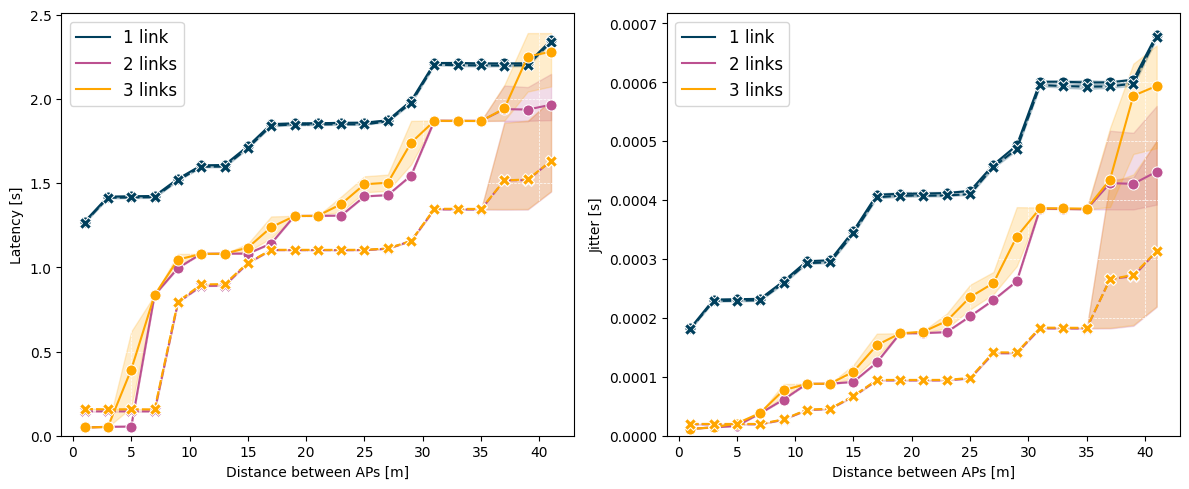

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)  # Dwa wykresy w jednym rzędzie

# Pierwszy wykres - Latency
sns.lineplot(data=plot_sum, x='distance', y='latency', hue='linksNumber', 
             errorbar=('ci'), markers=True, palette=palette, ax=axes[0], style='flow')

axes[0].tick_params(axis='y', which='both', labelleft=True)
for line in axes[0].get_lines():
    line.set_markersize(marker_size)

handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend(handles=handles[1:4], labels=['1 link', '2 links', '3 links'], 
               ncol=1, fontsize='large')

axes[0].set(xlabel='Distance between APs [m]', ylabel='Latency [s]')
axes[0].grid(color='white', linestyle='--', linewidth=0.5)

# Drugi wykres - Jitter
sns.lineplot(data=plot_sum, x='distance', y='jitter', hue='linksNumber', 
             errorbar=('ci'), markers=True, palette=palette, ax=axes[1], style='flow')

axes[1].tick_params(axis='y', which='both', labelleft=True)
for line in axes[1].get_lines():
    line.set_markersize(marker_size)

handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles=handles[1:4], labels=['1 link', '2 links', '3 links'], 
               ncol=1, fontsize='large')

axes[1].set(xlabel='Distance between APs [m]', ylabel='Jitter [s]')
axes[1].grid(color='white', linestyle='--', linewidth=0.5)
axes[0].set_ylim(0)  # Ustawienie minimalnej wartości osi Y na 0 dla Throughput
axes[1].set_ylim(0)  # Ustawienie minimalnej wartości osi Y na 0 dla Loss
plt.tight_layout()  # Optymalne rozmieszczenie wykresów
plt.savefig('dist_lat_jitter.svg', bbox_inches='tight')
plt.show()
